# **Task 1: Data Cleaning and Formatting**

In [1]:
import pandas as pd
df = pd.read_csv('/content/Barclays_data.csv',skipinitialspace = True)

In [2]:
df['TransactionAmount'] = df['TransactionAmount'].astype(str).str.replace('[^0-9.-]', '', regex=True)
df['TransactionAmount'] = pd.to_numeric(df['TransactionAmount'], errors='coerce')

In [3]:
df['date_clean'] = pd.to_datetime(df.TransactionDate, errors = 'coerce')

In [4]:
df['AccountType'] = df['AccountType'].str.strip().str.title()
df['TransactionType'] = df['TransactionType'].str.strip().str.upper()

In [5]:
df = df.dropna(subset=['TransactionAmount','date_clean'])

In [6]:
df

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths,date_clean
0,118,CUST3810,ACC49774,Savings,DEPOSIT,Credit Card,Firm D,West,Manager 4,08-01-2024,20664.40982,88483.42208,0.483333,522,29,2024-08-01
12,53,CUST5920,ACC49422,Credit,WITHDRAWAL,Mutual Fund,Firm B,South,Manager 3,06-11-2023,65215.76119,42285.97578,0.234974,837,227,2023-06-11
15,169,CUST5705,ACC42710,Current,WITHDRAWAL,Personal Loan,Firm D,North,Manager 1,12-05-2023,101996.56660,83829.28291,0.185980,833,169,2023-12-05
16,185,CUST5705,ACC92360,Credit,PAYMENT,Savings Account,Firm C,East,Manager 3,06-09-2023,14658.77585,114622.94470,0.231351,395,157,2023-06-09
20,176,CUST5610,ACC25811,Loan,PAYMENT,Mutual Fund,Firm B,South,Manager 2,06-02-2024,33936.64367,79341.49720,0.620230,589,41,2024-06-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,159,CUST3015,ACC92558,Savings,PAYMENT,Savings Account,Firm A,Central,Manager 3,05-05-2023,101394.49730,26763.90303,0.387198,624,34,2023-05-05
786,129,CUST4794,ACC49364,Credit,TRANSFER,Savings Account,Firm E,North,Manager 3,01-06-2023,86674.52798,90166.74624,0.589847,647,158,2023-01-06
794,157,CUST8660,ACC58078,Loan,WITHDRAWAL,Personal Loan,Firm A,North,Manager 1,12-02-2023,68043.00322,127252.70430,0.632127,523,239,2023-12-02
796,106,CUST6937,ACC65144,Savings,TRANSFER,Mutual Fund,Firm D,East,Manager 3,06-07-2023,57508.00185,19847.81739,0.909006,748,72,2023-06-07


# ***Task 2: Descriptive Transactional Analysis***

In [7]:
# monthly and yearly summaries of total credits, debits, and net transaction volume

df['Month'] = df.date_clean.dt.to_period('M')
monthly_summary = df.groupby(['Month','TransactionType'])['TransactionAmount'].sum().unstack().fillna(0)
print(monthly_summary)

TransactionType        DEPOSIT        PAYMENT       TRANSFER     WITHDRAWAL
Month                                                                      
2023-01          102230.777000  396805.528330  513565.017980  216778.919470
2023-02          217868.116620   26053.329650   79537.164140       0.000000
2023-03          241474.616656    9488.942966  248537.787530   86566.271639
2023-04           87843.639073  133136.680141  403550.134090  218107.002100
2023-05          172541.331860  497248.214379  321364.717550  107696.799800
2023-06          416404.199180  420125.325190  525830.825482  532541.996616
2023-07          198972.624190  153024.036150  298699.014620       0.000000
2023-08          324188.385040  247024.374560  227742.811410  514315.115470
2023-09               0.000000  135823.722210   69011.597061   53861.137520
2023-10          309536.745680  584782.014370  190722.597000  189547.260700
2023-11          175926.341710  269261.476570  385045.992060  246308.520622
2023-12     

In [8]:
# Yearly summary

df['Year'] = df['date_clean'].dt.year
yearly_summary = df.groupby(['Year','TransactionType'])['TransactionAmount'].sum().unstack().fillna(0)
print(yearly_summary)

TransactionType       DEPOSIT       PAYMENT      TRANSFER    WITHDRAWAL
Year                                                                   
2023             2.246987e+06  3.068703e+06  3.639028e+06  2.484048e+06
2024             1.640795e+06  9.979212e+05  1.337129e+06  1.522511e+06


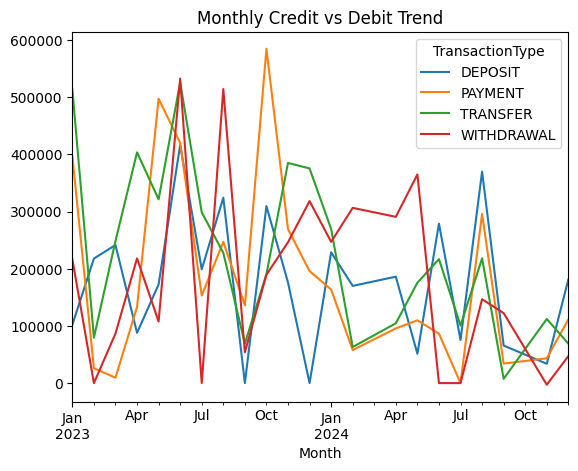

In [9]:
# Plotting trends over time
import matplotlib.pyplot as plt
monthly_summary.plot(kind='line')
plt.title("Monthly Credit vs Debit Trend")
plt.show()

In [10]:
# Top performing accounts based on net inflow
acct_net = df.groupby('AccountID')['TransactionAmount'].sum().sort_values(ascending=False)
top10 = acct_net.head(10)
print(top10)

AccountID
ACC54589    466994.02713
ACC42710    430992.46852
ACC92558    423546.82565
ACC51593    302956.35635
ACC64022    280704.62307
ACC80131    262810.52358
ACC19178    255599.36727
ACC21429    250567.97260
ACC55729    245539.40399
ACC12334    230513.36771
Name: TransactionAmount, dtype: float64


In [11]:
import seaborn as sns

<Axes: title={'center': 'Top performing accounts'}, xlabel='AccountID', ylabel='Net Transaction Amount'>

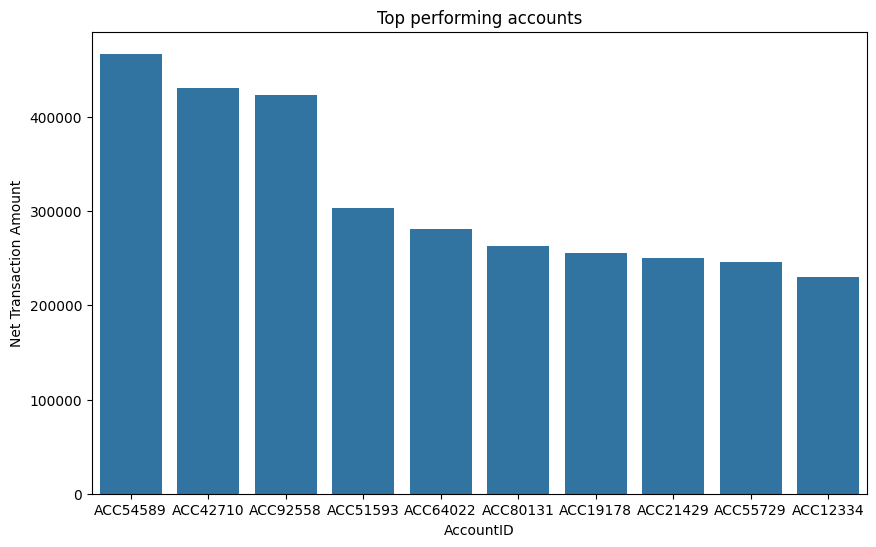

In [12]:
plt.figure(figsize=(10,6))
plt.title("Top performing accounts")
plt.xlabel("AccountID")
plt.ylabel("Net Transaction Amount")
sns.barplot(x=top10.index, y=top10.values)

In [13]:
# Bottom performing accounts based on net inflow:
Bottom10 = acct_net.tail(10)
print(Bottom10)

AccountID
ACC96868    20346.625400
ACC52650    19904.777256
ACC35419    18969.706802
ACC76699    15533.680530
ACC48501    14881.167950
ACC61926     7835.672309
ACC43309     7674.262152
ACC42467     5847.832762
ACC65545     4120.984679
ACC90887     1086.210765
Name: TransactionAmount, dtype: float64


In [14]:
# Identifying and flag accounts as dormant or inactive if there is a gap of two months or more
# between consecutive transactions:
df_sorted = df.sort_values(['AccountID','date_clean'])
df_sorted['gap_days'] = df_sorted.groupby('AccountID')['date_clean'].diff().dt.days
dormant_accounts = df_sorted[df_sorted['gap_days'] > 60]['AccountID'].unique()
print(dormant_accounts)

['ACC10117' 'ACC11062' 'ACC12334' 'ACC15228' 'ACC19156' 'ACC19178'
 'ACC21429' 'ACC21719' 'ACC21878' 'ACC22036' 'ACC22255' 'ACC23985'
 'ACC25132' 'ACC26940' 'ACC26956' 'ACC29007' 'ACC29396' 'ACC29477'
 'ACC30787' 'ACC31539' 'ACC31902' 'ACC32627' 'ACC33287' 'ACC34431'
 'ACC34568' 'ACC34821' 'ACC39482' 'ACC39529' 'ACC40939' 'ACC42467'
 'ACC42710' 'ACC45101' 'ACC45521' 'ACC45907' 'ACC46655' 'ACC47099'
 'ACC49180' 'ACC49364' 'ACC49422' 'ACC49774' 'ACC51593' 'ACC54589'
 'ACC58078' 'ACC60432' 'ACC64022' 'ACC66086' 'ACC67701' 'ACC69323'
 'ACC70314' 'ACC70460' 'ACC71388' 'ACC71938' 'ACC72197' 'ACC75675'
 'ACC76549' 'ACC76597' 'ACC77592' 'ACC77773' 'ACC78089' 'ACC78581'
 'ACC78589' 'ACC80131' 'ACC82298' 'ACC82381' 'ACC83005' 'ACC83269'
 'ACC83581' 'ACC83848' 'ACC88286' 'ACC88449' 'ACC90887' 'ACC92360'
 'ACC92558' 'ACC95164' 'ACC97225' 'ACC99409']


# ***Task 3: Customer Profile Building***

In [15]:
# Grouping accounts by activity levels:
# Rubrics:
# Low --> Total Transactions<=2
# Medium ---> Total Transactions >2 and <=4
# High ---> Total Transaction >=5

profile = df.groupby('AccountID').agg(
    total_transactions=('TransactionID', 'count'),
    total_inflow = ('TransactionAmount', 'sum'),
    avg_balance = ('AccountBalance', 'mean')
).reset_index()

profile['activity_level'] = pd.cut(profile['total_transactions'],
                                   bins=[-1,2,4,1e9],
                                   labels=['Low','Medium','High'])
profile.head(30)

,AccountID,total_transactions,total_inflow,avg_balance,activity_level
0,ACC10117,3,177550.151550,100686.898200,Medium
1,ACC10996,1,70136.967170,25464.127790,Low
2,ACC11062,2,110594.783980,65947.316965,Low
3,ACC11188,1,20835.546350,86796.680310,Low
4,ACC12334,3,230513.367710,27143.265607,Medium
5,ACC15228,4,169094.207541,93709.956587,Medium
6,ACC15359,2,50011.889380,66401.687335,Low
7,ACC15925,1,66974.968290,49648.462570,Low
8,ACC16241,1,48633.263000,15180.432510,Low
9,ACC16664,1,107144.803400,73757.355750,Low


In [16]:
# Segmenting customers by average balance and transaction volume:

customer_segments = df.groupby("CustomerID").agg(
    avg_balance=('AccountBalance', 'mean'),
    avg_txn_amount=('TransactionAmount', 'mean'),
    total_txn=('TransactionID', 'count')
).reset_index()

In [17]:
balance_bins = customer_segments['avg_balance'].quantile([0, 0.33, 0.66, 1]).values
amount_bins = customer_segments['avg_txn_amount'].quantile([0, 0.33, 0.66, 1]).values

customer_segments['balance_segment'] = pd.cut(
    customer_segments['avg_balance'],
    bins=balance_bins,
    labels=['Low Balance', 'Medium Balance', 'High Balance'],
    include_lowest=True,
    duplicates='drop'
)

customer_segments['amount_segment'] = pd.cut(
    customer_segments['avg_txn_amount'],
    bins=amount_bins,
    labels=['Low Spender', 'Medium Spender', 'High Spender'],
    include_lowest=True,
    duplicates='drop'
)

In [18]:
customer_segments['combined_segment'] = (
    customer_segments['balance_segment'].astype(str)
    + " | "
    + customer_segments['amount_segment'].astype(str)
)

In [19]:
customer_segments

,CustomerID,avg_balance,avg_txn_amount,total_txn,balance_segment,amount_segment,combined_segment
0,CUST1042,111660.679000,59642.065170,1,High Balance,Medium Spender,High Balance | Medium Spender
1,CUST1114,99018.533450,39721.284650,1,High Balance,Low Spender,High Balance | Low Spender
2,CUST1121,83103.736320,13783.954250,1,Medium Balance,Low Spender,Medium Balance | Low Spender
3,CUST1189,48001.048005,96525.228050,2,Low Balance,High Spender,Low Balance | High Spender
4,CUST1223,46609.716930,86652.652360,1,Low Balance,High Spender,Low Balance | High Spender
...,...,...,...,...,...,...,...
142,CUST9564,96467.981205,104645.762800,2,High Balance,High Spender,High Balance | High Spender
143,CUST9666,63959.895530,65853.519200,1,Medium Balance,High Spender,Medium Balance | High Spender
144,CUST9731,80384.574728,73121.140433,4,Medium Balance,High Spender,Medium Balance | High Spender
145,CUST9843,70513.535370,54301.392025,2,Medium Balance,Medium Spender,Medium Balance | Medium Spender


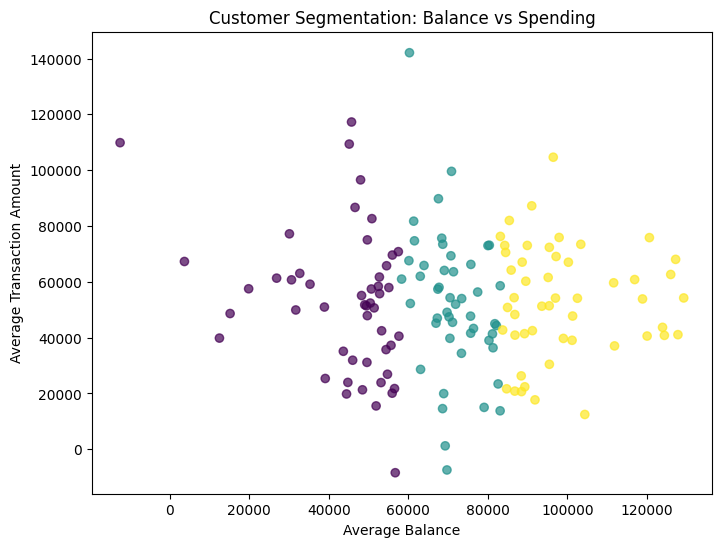

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(customer_segments['avg_balance'],
            customer_segments['avg_txn_amount'],
            c=customer_segments['balance_segment'].cat.codes, alpha=0.7)
plt.xlabel("Average Balance")
plt.ylabel("Average Transaction Amount")
plt.title("Customer Segmentation: Balance vs Spending")
plt.show()

In [21]:
# High net inflow accounts:
high_inflow = profile.sort_values(by = 'total_inflow', ascending = False).head(50)
high_inflow

,AccountID,total_transactions,total_inflow,avg_balance,activity_level
82,ACC54589,6,466994.027130,54916.744670,High
58,ACC42710,7,430992.468520,59338.567807,High
148,ACC92558,5,423546.825650,63110.498334,High
78,ACC51593,4,302956.356350,96361.553762,Medium
95,ACC64022,4,280704.623070,77527.760875,Medium
126,ACC80131,4,262810.523580,76470.034708,Medium
13,ACC19178,6,255599.367270,79438.676415,High
15,ACC21429,4,250567.972600,67914.810115,Medium
84,ACC55729,4,245539.403990,56327.446467,Medium
4,ACC12334,3,230513.367710,27143.265607,Medium


In [22]:
# High-frequency low-balance accounts:
# Calculating the threshold average balance
threshold_avg_balance = profile.loc[profile['activity_level'] == 'High', 'avg_balance'].mean()
threshold_avg_balance
Hf_low_bal_accounts = profile[(profile['activity_level'] == 'High') & (profile['avg_balance'] < threshold_avg_balance)]
Hf_low_bal_accounts

,AccountID,total_transactions,total_inflow,avg_balance,activity_level
58,ACC42710,7,430992.46852,59338.567807,High
73,ACC49422,5,189282.99930,53789.003897,High
82,ACC54589,6,466994.02713,54916.744670,High


In [23]:
# Accounts with negative or near zero balances:
negative_accounts = profile[profile.avg_balance < 0]
negative_accounts

,AccountID,total_transactions,total_inflow,avg_balance,activity_level
56,ACC41829,1,23800.71917,-2531.437176,Low


# ***Task 4: Financial Risk Identification***

In [24]:
# Large withdrawals:
# Calculating first the threshold value:
threshold = df.loc[df.TransactionType == 'WITHDRAWAL', 'TransactionAmount'].quantile(0.95)
threshold

# Accounts with frequent large withdrawals:
large_withdrawals = df.loc[(df.TransactionType == 'WITHDRAWAL') & (df.TransactionAmount > threshold)]
large_withdrawals

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths,date_clean,Month,Year
121,180,CUST2842,ACC49180,Current,WITHDRAWAL,Home Loan,Firm C,North,Manager 3,01-04-2024,109356.8390,45153.93637,0.560205,388,162,2024-01-04,2024-01,2024
251,157,CUST2871,ACC43771,Credit,WITHDRAWAL,Mutual Fund,Firm D,East,Manager 4,11-05-2023,117259.1168,45725.22114,0.596077,380,181,2023-11-05,2023-11,2023
434,23,CUST2464,ACC34568,Loan,WITHDRAWAL,Mutual Fund,Firm C,East,Manager 2,12-05-2023,109238.6461,91912.41131,0.332623,561,147,2023-12-05,2023-12,2023
492,111,CUST8028,ACC40939,Loan,WITHDRAWAL,Savings Account,Firm A,West,Manager 1,05-05-2023,107696.7998,41353.73521,0.522655,726,155,2023-05-05,2023-05,2023


In [25]:
# Calculating balance volatility using standard deviation:
volatility = df.groupby('AccountID')['AccountBalance'].std().rename('BalanceVolatility')
volatility

,BalanceVolatility
AccountID,
ACC10117,8996.864497
ACC10996,NaN
ACC11062,22572.552392
ACC11188,NaN
ACC12334,7710.352740
...,...
ACC97225,17885.106696
ACC97411,NaN
ACC99117,NaN


In [26]:
# Calculating IQR:
Q1 = df.TransactionAmount.quantile(0.25)
Q3 = df.TransactionAmount.quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(40866.4893025)

In [27]:
# Calculating the account with anomalies

L_b = Q1 - 1.5*IQR
U_b = Q3 + 1.5*IQR
anomalies = df[(df.TransactionAmount < L_b) | (df.TransactionAmount > U_b)]
anomalies

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths,date_clean,Month,Year
710,117,CUST3041,ACC95164,Credit,DEPOSIT,Credit Card,Firm A,West,Manager 3,06-04-2024,142081.629,60296.30589,0.368576,560,104,2024-06-04,2024-06,2024


# **Task 5: Visualisation**

Text(0.5, 1.0, 'MONTHLY CREDIT VS DEBIT')

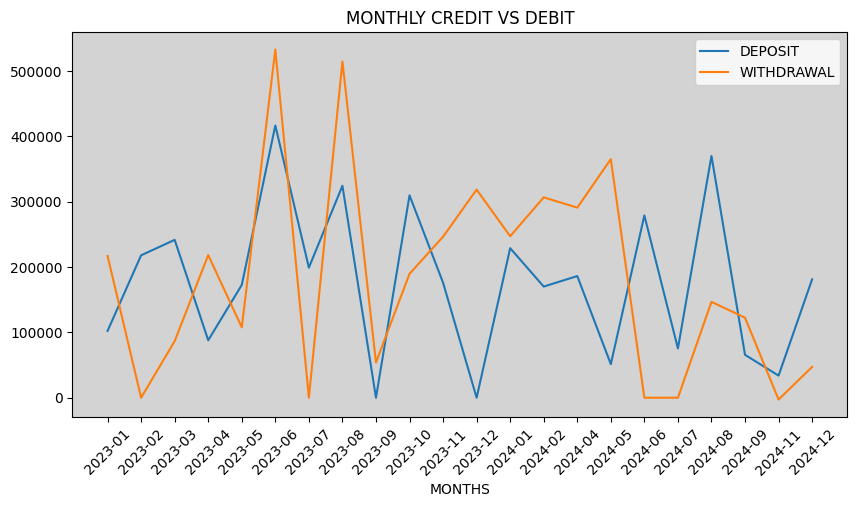

In [28]:
# Calculating monthly Deposit vs Withdrawal trend:
fig, cn = plt.subplots(figsize=(10,5))
cn.set_facecolor("lightgray")
# plt.figure(figsize=(10,5))
plt.plot(monthly_summary.index.astype(str), monthly_summary['DEPOSIT'], label='DEPOSIT')
plt.plot(monthly_summary.index.astype(str), monthly_summary['WITHDRAWAL'], label='WITHDRAWAL')
plt.legend();
plt.xticks(rotation=45);
plt.xlabel("MONTHS")
plt.title("MONTHLY CREDIT VS DEBIT")

<Axes: title={'center': 'Top performing accounts'}, xlabel='AccountID', ylabel='Net Transaction Amount'>

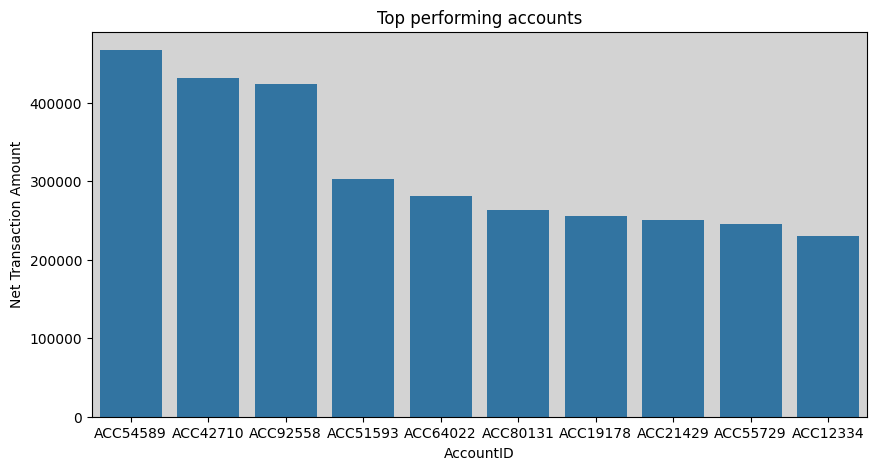

In [29]:
# Top 10 accounts by net inflow:
fig,cn = plt.subplots(figsize=(10,5))
cn.set_facecolor("lightgrey")
plt.title("Top performing accounts")
plt.xlabel("AccountID")
plt.ylabel("Net Transaction Amount")
sns.barplot(x=top10.index, y=top10.values)

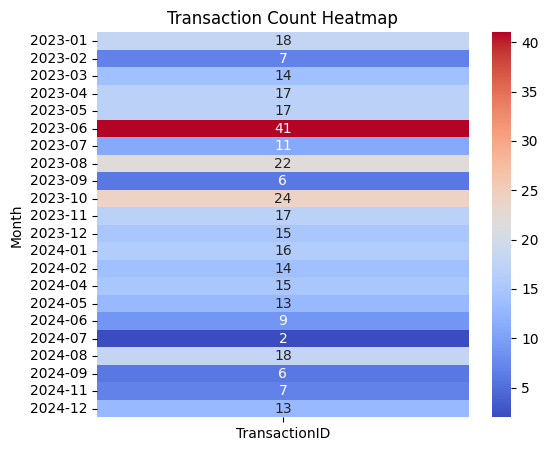

In [30]:
# Heatmap for monthly Transaction Volume:

monthly_txn = df.groupby(['Month'])['TransactionID'].count().reset_index()
monthly_txn_pivot = monthly_txn.pivot_table(index='Month', values='TransactionID')
monthly_txn
plt.figure(figsize=(6,5))
sns.heatmap(monthly_txn_pivot, annot=True, cmap='coolwarm')
plt.title("Transaction Count Heatmap")
plt.show()

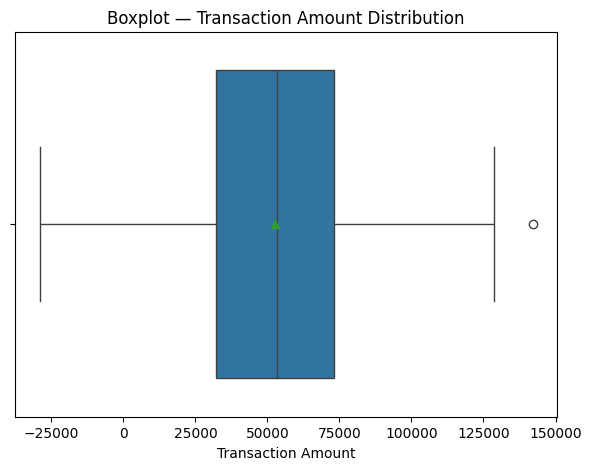

In [31]:
# Transaction Amount Distribution (BOXPLOT):

plt.figure(figsize=(7,5))
sns.boxplot(x=df['TransactionAmount'], showmeans = True)
plt.title("Boxplot — Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.show()

Text(0, 0.5, 'Average Transaction Amount')

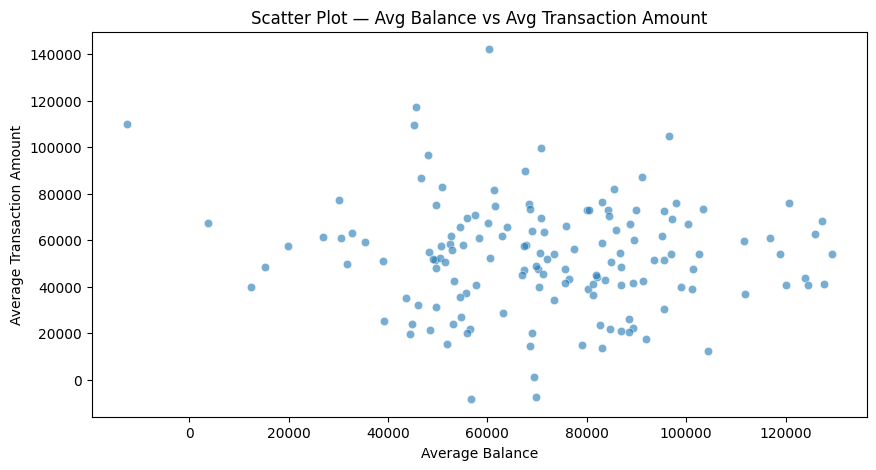

In [32]:
# Average Balance vs Average Transaction Amount:

cust = df.groupby('CustomerID').agg(
    avg_balance = ('AccountBalance', 'mean'),
    avg_transaction_amount = ('TransactionAmount', 'mean')
).reset_index()

fig, cn = plt.subplots(figsize=(10,5))
sns.scatterplot(x = cust['avg_balance'], y = cust['avg_transaction_amount'], alpha=0.6)
plt.title("Scatter Plot — Avg Balance vs Avg Transaction Amount")
plt.xlabel("Average Balance")
plt.ylabel("Average Transaction Amount")

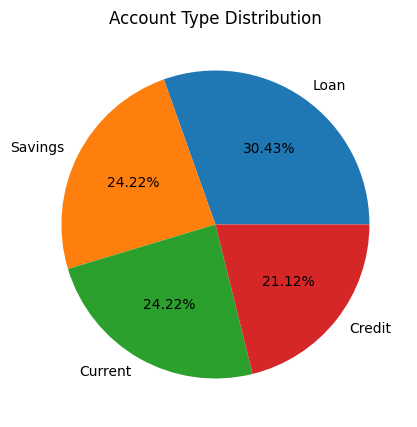

In [33]:
# Account Type Distribution:
plt.figure(figsize = (10,5))
plt.title("Account Type Distribution")
plt.pie(df.AccountType.value_counts(), labels = df.AccountType.value_counts().keys(), autopct = "%1.2f%%")
plt.show()


# **Task 6: Hypothesis Testing**

In [34]:
# Test whether high-volume transaction accounts have statistically higher average
# balances than low-volume accounts.
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, levene

acct = df.groupby('AccountID').agg(
    txn_count=('TransactionID','count'),
    avg_balance=('AccountBalance','mean')
).reset_index()

# Remove NA / infinite
acct = acct.replace([np.inf, -np.inf], np.nan).dropna(subset=['txn_count','avg_balance'])

# ---- Grouping: median split ----
median_txn = acct['txn_count'].median()
high = acct.loc[acct['txn_count'] >  median_txn, 'avg_balance']
low  = acct.loc[acct['txn_count'] <= median_txn, 'avg_balance']

print(f"High n={len(high)}, Low n={len(low)}")

# Quick sanity: need some data in both groups
assert len(high) > 10 and len(low) > 10, "Groups too small; adjust rule or use quantiles."

# ---- Variance check (optional) ----
w_stat, w_p = levene(high, low, center='median')
print(f"Levene variance test p={w_p:.4f} (p<0.05 means variances differ)")

# ---- Welch t-test (safe default) ----
t_stat, p_val = ttest_ind(high, low, equal_var=False, nan_policy='omit')
print(f"Welch t-test: t={t_stat:.3f}, p={p_val:.5f}")

# One-sided p-value (High > Low)
p_one_sided = p_val / 2 if t_stat > 0 else 1 - (p_val / 2)
print(f"One-sided p-value (High > Low) = {p_one_sided:.5f}")

alpha = 0.05
if p_one_sided < alpha:
    print("Conclusion: Reject H0 → High-volume accounts have significantly higher average balance.")
else:
    print("Conclusion: Fail to reject H0 → No significant evidence that High_volume accounts have significantly higher average balance than Low_volume accounts")

# ---- Effect size (Cohen's d using pooled SD) ----
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    vx, vy = np.var(x, ddof=1), np.var(y, ddof=1)
    sp2 = ((nx-1)*vx + (ny-1)*vy) / (nx+ny-2)
    return (np.mean(x) - np.mean(y)) / np.sqrt(sp2)

d = cohens_d(high.values, low.values)
print(f"Cohen's d = {d:.3f}  (0.2=small, 0.5=medium, 0.8=large)")


High n=45, Low n=115
Levene variance test p=0.0359 (p<0.05 means variances differ)
Welch t-test: t=0.388, p=0.69878
One-sided p-value (High > Low) = 0.34939
Conclusion: Fail to reject H0 → No significant evidence that High_volume accounts have significantly higher average balance than Low_volume accounts
Cohen's d = 0.060  (0.2=small, 0.5=medium, 0.8=large)


# **Task 7: Video Presentation**

Video Link ----> https://www.loom.com/share/56af54df97dd4a28967712c26e668c42